In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#Read the data set 
df = pd.read_csv('height-weight (1).csv')

In [22]:
df.head(
   
 )

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


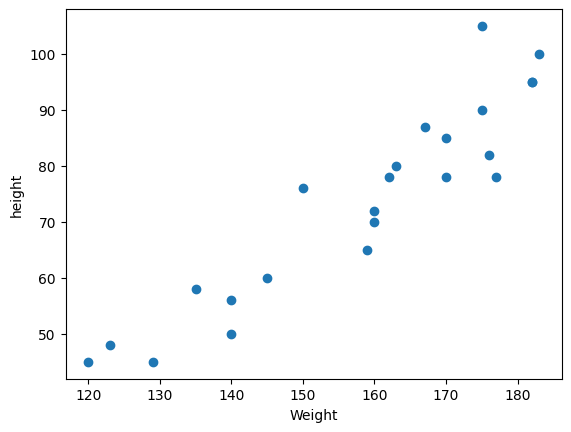

In [23]:
plt.scatter(df.Height,df.Weight)
plt.xlabel('Weight')
plt.ylabel('height')
plt.show()


In [24]:
 #divide datset into independent and dependent features
X = df[['Weight']]

y = df[['Height']]

In [25]:
from sklearn.model_selection import train_test_split 


In [26]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=42) 

In [27]:
X_train.shape , X_test.shape

((18, 1), (5, 1))

In [28]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


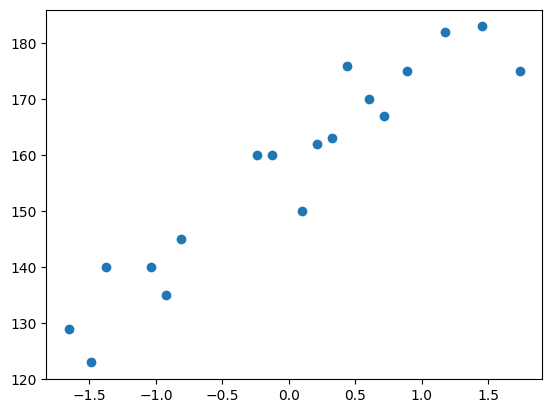

In [31]:
plt.scatter(X_train,y_train)

=== GOOD MODEL METRICS ===
MAE  : 2.348
MSE  : 8.144
RMSE : 2.854
R²   : 0.863

=== BAD MODEL METRICS ===
MAE  : 6.514
MSE  : 50.311
RMSE : 7.093
R²   : 0.153


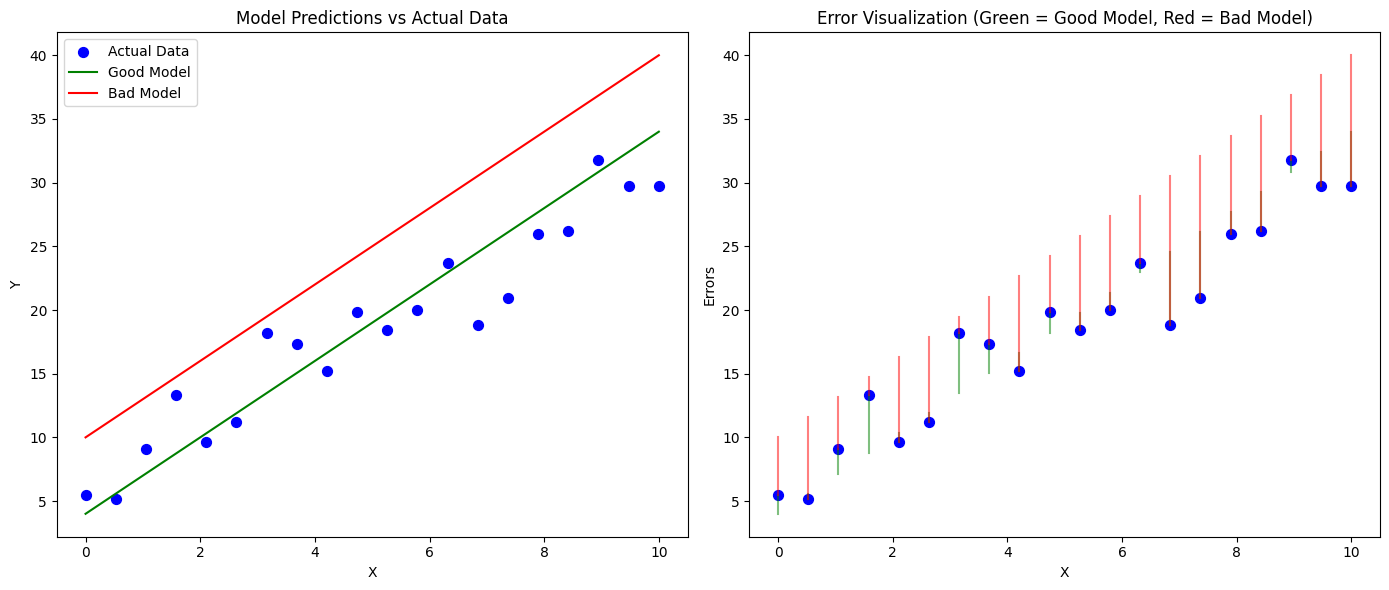

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------------------------------
# 1. Create a simple regression dataset
# ----------------------------------------------------
np.random.seed(42)

X = np.linspace(0, 10, 20)
y_true = 3 * X + 4 + np.random.normal(0, 3, size=20)   # True relationship with noise

# Two prediction models for comparison
y_pred_good = 3 * X + 4                     # Perfect line (no noise)
y_pred_bad = 3 * X + 10                     # Shifted line (worse fit)

# ----------------------------------------------------
# 2. Metrics calculation
# ----------------------------------------------------
def regression_metrics(y, pred):
    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    return mae, mse, rmse, r2

m_good = regression_metrics(y_true, y_pred_good)
m_bad  = regression_metrics(y_true, y_pred_bad)

# ----------------------------------------------------
# 3. Print metrics
# ----------------------------------------------------
print("=== GOOD MODEL METRICS ===")
print(f"MAE  : {m_good[0]:.3f}")
print(f"MSE  : {m_good[1]:.3f}")
print(f"RMSE : {m_good[2]:.3f}")
print(f"R²   : {m_good[3]:.3f}")

print("\n=== BAD MODEL METRICS ===")
print(f"MAE  : {m_bad[0]:.3f}")
print(f"MSE  : {m_bad[1]:.3f}")
print(f"RMSE : {m_bad[2]:.3f}")
print(f"R²   : {m_bad[3]:.3f}")

# ----------------------------------------------------
# 4. Visualization
# ----------------------------------------------------
plt.figure(figsize=(14, 6))

# Scatter and predictions
plt.subplot(1, 2, 1)
plt.scatter(X, y_true, color="blue", label="Actual Data", s=50)
plt.plot(X, y_pred_good, color="green", label="Good Model")
plt.plot(X, y_pred_bad, color="red", label="Bad Model")
plt.title("Model Predictions vs Actual Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Error bars visualization
plt.subplot(1, 2, 2)
for i in range(len(X)):
    # Vertical error lines for good model
    plt.plot([X[i], X[i]], [y_true[i], y_pred_good[i]], color="green", alpha=0.5)
    # Vertical error lines for bad model
    plt.plot([X[i], X[i]], [y_true[i], y_pred_bad[i]], color="red", alpha=0.5)

plt.scatter(X, y_true, color="blue", s=50)
plt.title("Error Visualization (Green = Good Model, Red = Bad Model)")
plt.xlabel("X")
plt.ylabel("Errors")
plt.tight_layout()
plt.show()


In [62]:
import pandas as pd
%matplotlib inline


In [63]:
df = pd.read_csv("height-weight (1).csv")
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight')

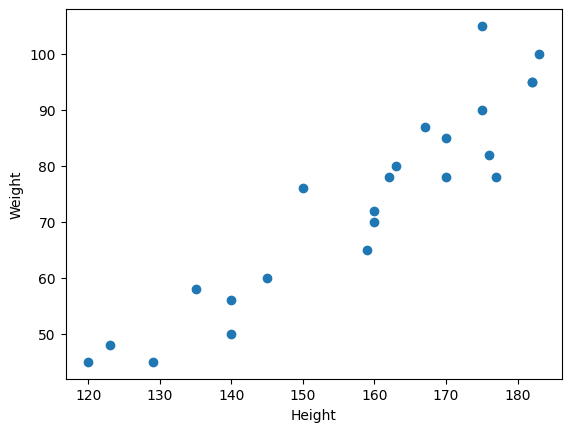

In [64]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel("Height")
plt.ylabel("Weight")

In [65]:
X = df[['Height']]# Independent variable
y = df['Weight']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Standardize the data = Units 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [68]:
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

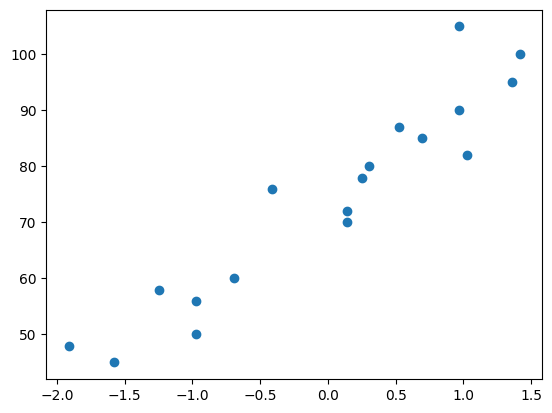

In [69]:
plt.scatter(X_train, y_train)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
print("The coefficient is:", regressor.coef_)
print("The intercept is:", regressor.intercept_)



The coefficient is: [16.71556824]
The intercept is: 74.27777777777777


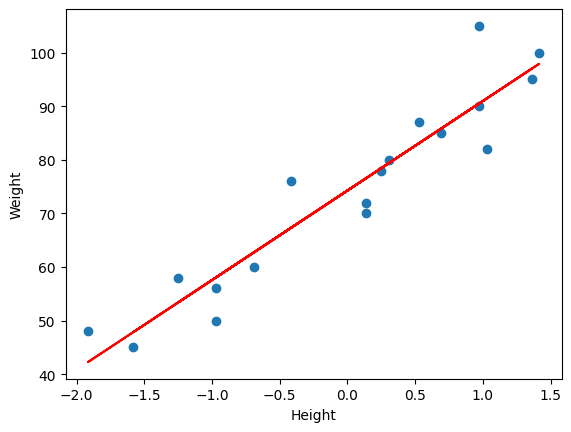

In [73]:
plt.scatter(X_train, y_train)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot(X_train, regressor.predict(X_train), color='red')



In [74]:
y_pred_test = regressor.predict(X_test)
y_pred_test , y_test 

(array([92.36074777, 85.86942521, 39.50283548, 96.99740674, 75.66877547]),
 15    78
 9     78
 0     45
 8     95
 17    65
 Name: Weight, dtype: int64)

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

In [76]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 8.078703941181502
Mean Squared Error: 83.23803021031195
Root Mean Squared Error: 9.123487831433325


In [80]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_test)
print("R² Score:", r2)

R² Score: 0.6981504561563971


In [81]:

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)

Adjusted R² Score: 0.5975339415418628
